In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mst
from cycler import cycler
from scipy.signal import savgol_filter
from datetime import datetime
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.optimize import fmin, minimize
import glob
import matplotlib.gridspec as gridspec



"""Funktionen"""
def load (initpath,datei,skip,separation):
    
    initpath= initpath +"/" + datei
    temp_df = np.array(pd.read_csv(initpath, comment='~', skiprows=skip, sep=separation,
                           encoding='latin1', header=None, on_bad_lines='skip',
                           decimal='.'))
    return temp_df
    

def filtplot(array,line1,line2,plot,col):
    temp=array[array[:,1]>=line1]
    temp=temp[temp[:,1]<=line2]
    if plot: plt.plot(temp[:,0]-temp[0,0],temp[:,col])
    
    return temp



In [23]:
initpath=r"C:\Users\maxim\Nextcloud\Shared\Austausch_Max\Projekt_Entropie\Age_Pouch"
dateinamen = os.listdir(initpath)
dateien= [datei for datei in dateinamen if "_CU" not in datei and "Checkup" not in datei]
data=[]
data_test={}
for datei in dateien:	 
    data_raw=load(initpath,datei,skip=0,separation=" ")
    data_temp=np.delete(data_raw,[1,2,3,5,12,13],1)
    data.append(data_temp)
    data_test[datei]=data_temp
print(data_test['CUB21NMC4606_TA_age1.txt'][:5,:])

[[0.0 2 3.74402502778986 0.0 0.0 0.0 28.5761174704447 28.8160148560817]
 [5.55555555555556e-07 2 3.74383315442196 0.0 0.0 0.0 28.5761174704447
  28.8160148560817]
 [0.0027777776851851 2 3.74383315442196 0.0 0.0 0.0 28.594284105836
  28.8160148560817]
 [0.0028462446296296 4 3.74383315442196 -0.0613831951375067
  -4.20271981130217e-06 -4.20271981130217e-06 28.594284105836
  28.8160148560817]
 [0.0028468002777777 4 3.7841265616805 63.8003289549214
  3.12478148237426e-05 3.12478148237426e-05 28.594284105836
  28.8160148560817]]


Zyklen zählen

CUB21NMC4606_TA_age1.txt 250
CUB21NMC4606_TA_age2.txt 250
CUB21NMC4606_TA_age3.txt 250
CUB21NMC4606_TA_age4.txt 250
CUB21NMC4606_TA_age5.txt 68
CUB21NMC6001_TA_age1.txt 87
CUB21NMC6001_TA_age2.txt 250
CUB21NMC6001_TA_age3.txt 149


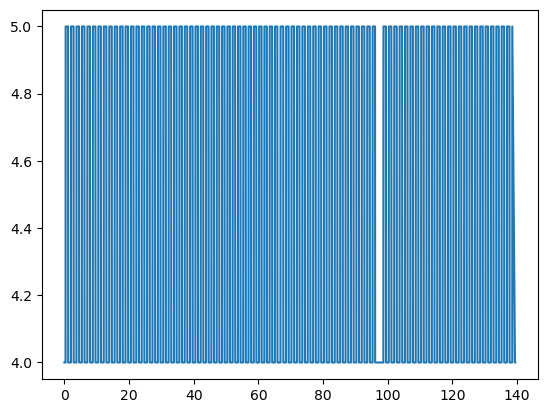

In [31]:
temp=filtplot(data_test["CUB21NMC6001_TA_age1.txt"],4,5,plot=1,col=1)
for i in data_test.keys():
    zyklen = 0
    for l in range(1, len(data_test[i])):
        if data_test[i][l-1, 1] == 5 and data_test[i][l, 1] == 4:
            zyklen += 1
        elif data_test[i][l-1, 1] == 5 and data_test[i][l, 1] == 7:
            zyklen+=1
    print(i, zyklen)